In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
import numpy as np
import math
%matplotlib inline

In [2]:
df1 = pd.read_csv('./StedinEnergy.csv')
df2 = pd.read_csv('./LianderEnergy.csv')
df3 = pd.read_csv('./EnexisEnergy.csv')
df = pd.concat([df1,df2,df3])

In [3]:
df1.head()

,original_index,delta,period,city
0,5734,7861,1,ROTTERDAM
1,5684,-2844,1,ROTTERDAM
2,4590,95,1,ROTTERDAM
3,7025,117,1,ROTTERDAM
4,4809,-24133,1,ROTTERDAM


In [4]:
df2.head()

,original_index,delta,period,city
0,3443,-2415,1,AMSTERDAM
1,12321,1109,1,AMSTERDAM
2,13961,-39,1,AMSTERDAM
3,7199,2966,1,AMSTERDAM
4,5792,-1529,1,AMSTERDAM


In [5]:
df1.city.value_counts()

UTRECHT      12001
ROTTERDAM    12001
Name: city, dtype: int64

In [6]:
Firstperiod = df.loc[(df['period']==1), 'delta']
Secondperiod = df.loc[(df['period']==2), 'delta']
Thirdperiod = df.loc[(df['period']==3), 'delta']
Fourthperiod = df.loc[(df['period']==4), 'delta']

mean1 = Firstperiod.mean()
mean2 = Secondperiod.mean()
mean3 = Thirdperiod.mean()
mean4 = Fourthperiod.mean()
print(mean1, mean2, mean3, mean4)

-209.34301000000065 2.7960555555555557 -142.46044444444445 -140.89334610685327


In [29]:
df1 = pd.read_csv("./dutch-energy/Electricity/liander_electricity_01012010.csv")
df1['year'] = '2010'
df2 = pd.read_csv("./dutch-energy/Electricity/liander_electricity_01012012.csv")
df2['year'] = '2012'
df3 = pd.read_csv("./dutch-energy/Electricity/liander_electricity_01012015.csv")
df3['year'] = '2015'
df4 = pd.read_csv("./dutch-energy/Electricity/liander_electricity_01012018.csv")
df4['year'] = '2018'
df = pd.concat([df1,df2,df3,df4])


Ten = df.loc[(df['city']=='AMSTERDAM')&(df['year']=='2010'),'annual_consume']
Twelve = df.loc[(df['city']=='AMSTERDAM')&(df['year']=='2012'),'annual_consume']
Eighteen = df.loc[(df['city']=='AMSTERDAM')&(df['year']=='2018'), 'annual_consume']

Ten = Ten.reset_index(drop=True)
Twelve = Twelve.reset_index(drop=True)
Eighteen = Eighteen.reset_index(drop=True)

## Collecting 3000 randomly selected data points for each time period

In [32]:
Twelve.describe()

count    15218.000000
mean      3576.168419
std       3257.850965
min        340.000000
25%       2000.000000
50%       2591.500000
75%       3807.000000
max      52787.000000
Name: annual_consume, dtype: float64

In [49]:
First = pd.DataFrame()
for n in range(15000):
    i = random.randint(1, 15000)
    diff = pd.DataFrame({'delta':Twelve[i] - Ten[i]}, index=[i])
    First = pd.concat([First, diff])    
Second = pd.DataFrame()
for n in range(3000):
    i = random.randint(0, 15000)
    diff = pd.DataFrame({'delta':Eighteen[i] - Ten[i]}, index=[i])
    Second = pd.concat([Second, diff])

In [50]:
First['delta'].mean()

-37.06666666666667

In [51]:
Fourthperiod['delta'][1400]

-632.0

In [52]:
## two years versus 6 years

pop_mean = First['delta'].mean()
samp_mean = Second['delta'].mean()
samp_std = Second['delta'].std()
n = 3000

z = (samp_mean - pop_mean) / (samp_std / math.sqrt(3000))
print(z)

-1.8953992332052652


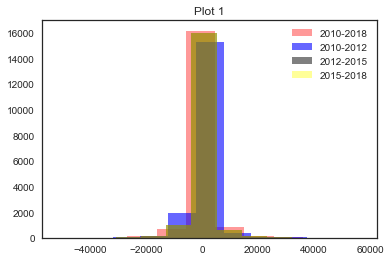

In [95]:
plt.hist(Firstperiod, color='red', alpha=0.4, label='2010-2018')
plt.hist(Secondperiod, color='blue', alpha=0.6, label='2010-2012')
plt.hist(Thirdperiod, color='black', alpha=0.5, label='2012-2015')
plt.hist(Fourthperiod, color='yellow', alpha=0.4, label='2015-2018')
plt.xlabel = 'annual_consumption'
plt.legend(loc='upper right')
plt.title('Plot 1')
plt.show()

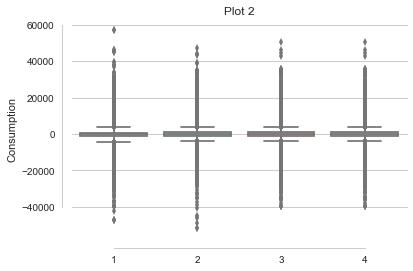

In [96]:
sns.set(style="whitegrid")

ax = sns.boxplot(x='period',y='delta',data=df,palette='pastel')  

plt.title('Plot 2')

sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='Consumption')

plt.show()

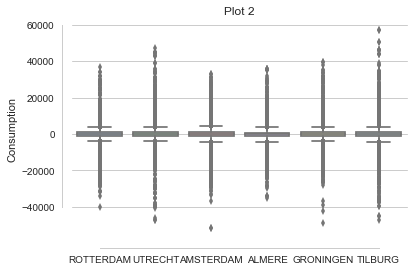

In [97]:
sns.set(style="whitegrid")

ax = sns.boxplot(x='city',y='delta',data=df,palette='pastel')  

plt.title('Plot 2')

sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='Consumption')

plt.show()

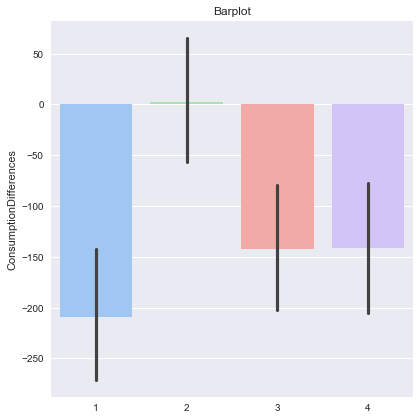

In [98]:
sns.set(style="darkgrid")

g = sns.factorplot(x="period", y="delta", data=df,
                   size=6, kind="bar", palette="pastel", ci=95)
g.despine(left=True)
g.set_ylabels("ConsumptionDifferences")
g.set_xlabels("")
plt.title('Barplot')
plt.show()

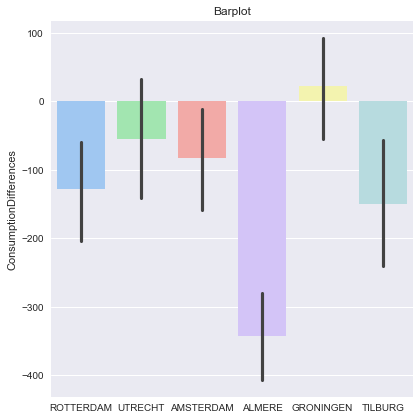

In [99]:
sns.set(style="darkgrid")

g = sns.factorplot(x="city", y="delta", data=df,
                   size=6, kind="bar", palette="pastel", ci=95)
g.despine(left=True)
g.set_ylabels("ConsumptionDifferences")
g.set_xlabels("")
plt.title('Barplot')
plt.show()

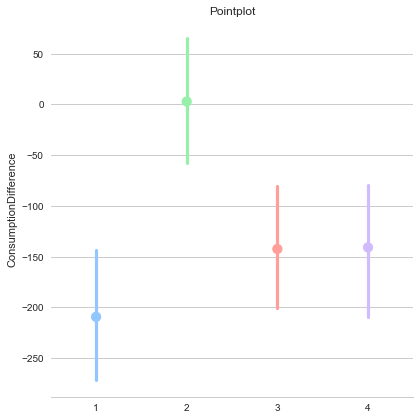

In [100]:
sns.set(style="whitegrid")

g = sns.factorplot(x="period", y="delta", data=df,
                   size=6, kind="point", palette="pastel",ci=95,dodge=True,join=False)
g.despine(left=True)
g.set_ylabels("ConsumptionDifference")
g.set_xlabels("")
plt.title('Pointplot')
plt.show()

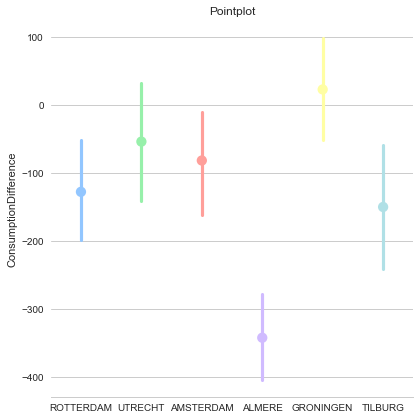

In [101]:
sns.set(style="whitegrid")

g = sns.factorplot(x="city", y="delta", data=df,
                   size=6, kind="point", palette="pastel",ci=95,dodge=True,join=False)
g.despine(left=True)
g.set_ylabels("ConsumptionDifference")
g.set_xlabels("")
plt.title('Pointplot')
plt.show()

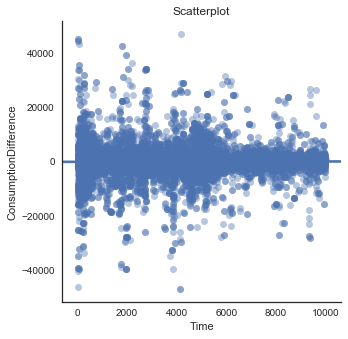

In [102]:
sns.set(style="white")
g = sns.lmplot(y='delta', # Variable 1.
               x='original_index', # Variable 2.
               data=df1, # Data
               fit_reg=True, # If set to true, plots a regression line.
               scatter_kws={'alpha':0.4},
              #x_jitter=10E5,
              #y_jitter=10E2
              ) # Set points to semi-transparent to see overlaping points.
g.set_ylabels("ConsumptionDifference")
g.set_xlabels("Time")
plt.title('Scatterplot')
plt.subplots_adjust(top=0.9)
plt.show()

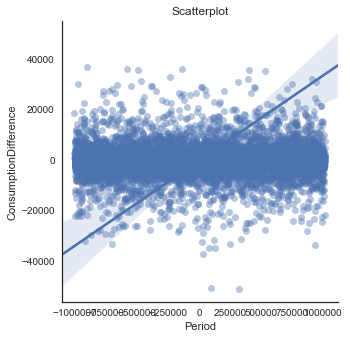

In [103]:
g = sns.lmplot(y='delta', # Variable 1.
               x='original_index', # Variable 2.
               data=df2, # Data
               fit_reg=True, # If set to true, plots a regression line.
               scatter_kws={'alpha':0.4},
              x_jitter=10E5,
              y_jitter=10E2) # Set points to semi-transparent to see overlaping points.
g.set_ylabels("ConsumptionDifference")
g.set_xlabels("Period")
plt.title('Scatterplot')
plt.subplots_adjust(top=0.9)
plt.show()

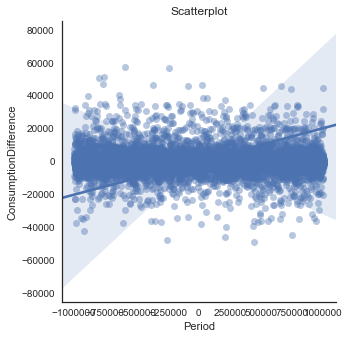

In [104]:
g = sns.lmplot(y='delta', # Variable 1.
               x='original_index', # Variable 2.
               data=df3, # Data
               fit_reg=True, # If set to true, plots a regression line.
               scatter_kws={'alpha':0.4},
              x_jitter=10E5,
              y_jitter=10E2) # Set points to semi-transparent to see overlaping points.
g.set_ylabels("ConsumptionDifference")
g.set_xlabels("Period")
plt.title('Scatterplot')
plt.subplots_adjust(top=0.9)
plt.show()